# IN THIS NOTEBOOK THIS IS WHAT I AIM TO ACHIEVE
- Developing a content-based recommender system using the genres and/or descriptions.
- Identifying the main content available on the streaming.
- Network analysis on the cast of the titles.
- Exploratory data analysis to find interesting insights.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/kaggle/input/netflix/"
credit_d = pd.read_csv(path + "credits.csv" )
title_d = pd.read_csv(path + "titles.csv" )
 
    
display("credits_data","",credit_d.head(),
       "titles_data","",title_d.head())

'credits_data'

''

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


'titles_data'

''

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# UNDERSTANDING THE DATA

In [3]:
title_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [4]:
title_d.describe(include = "object").T

,count,unique,top,freq
id,5850,5850,ts300399,1
title,5849,5798,The Gift,3
type,5850,2,MOVIE,3744
description,5832,5829,Five families struggle with the ups and downs ...,2
age_certification,3231,11,TV-MA,883
genres,5850,1726,['comedy'],484
production_countries,5850,452,['US'],1959
imdb_id,5447,5447,tt0075314,1


In [5]:
# we check for missing values..in percentage formart
title_d.isnull().sum()* 100 / len(title_d)

id                       0.000000
title                    0.017094
type                     0.000000
description              0.307692
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_id                  6.888889
imdb_score               8.239316
imdb_votes               8.512821
tmdb_popularity          1.555556
tmdb_score               5.316239
dtype: float64

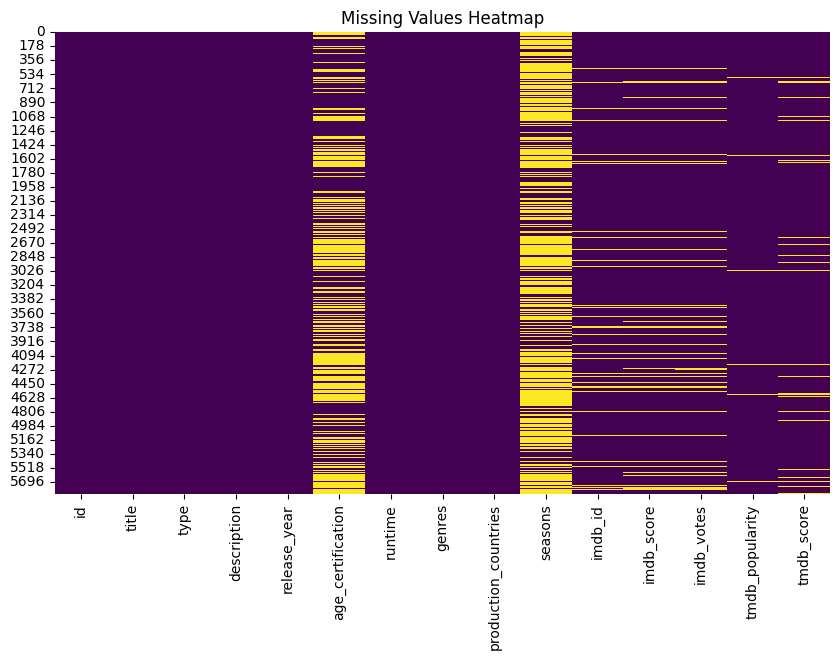

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(title_d.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# FILLING NULL VALUE(NUMERICAL/CATEGORICAL)

In [7]:
# filling null values 
# numerical columns / categorical columns
numerical_columns = title_d.select_dtypes(include=['number']).columns
categorical_columns = title_d.select_dtypes(include=['object' , 'category']).columns

# filling numerical columns with mean
for columns in numerical_columns:
    mean_values = title_d[numerical_columns].mean()
    title_d[numerical_columns] = title_d[numerical_columns].fillna(mean_values)

#  filling categorical columns
for columns in categorical_columns:
    title_d.fillna(title_d[columns].mode()[0],inplace= True)
    
title_d.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

# PLOTTING/VISUALIZING THE DISTRIBUTION OF OUR DAA

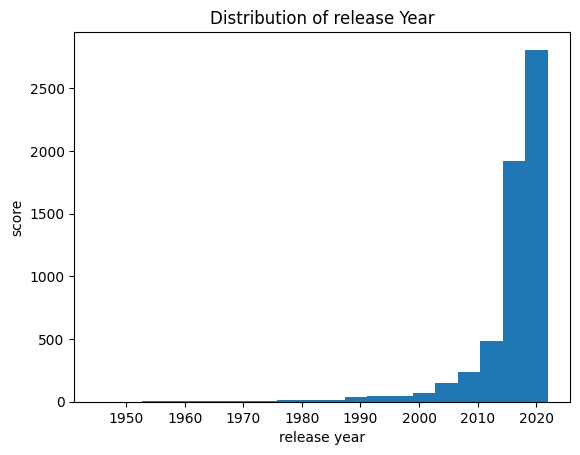

In [8]:
plt.title("Distribution of release Year")
plt.xlabel("release year")
plt.ylabel("score")
plt.hist(title_d['release_year'],bins=20)
plt.show()



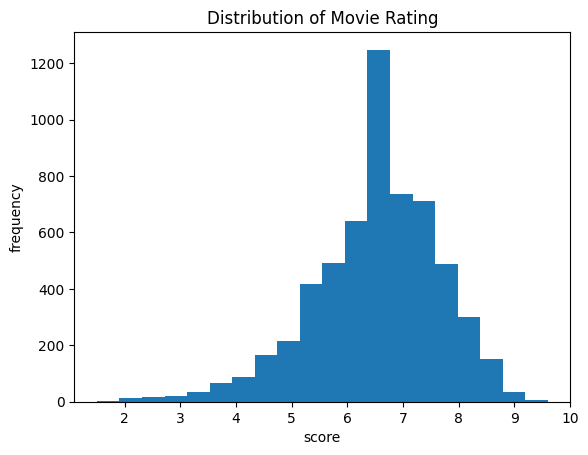

In [9]:
plt.title("Distribution of Movie Rating")
plt.xlabel("score")
plt.ylabel("frequency")
plt.hist(title_d['imdb_score'],bins=20)
plt.show()


- Comparison histogram between two columns

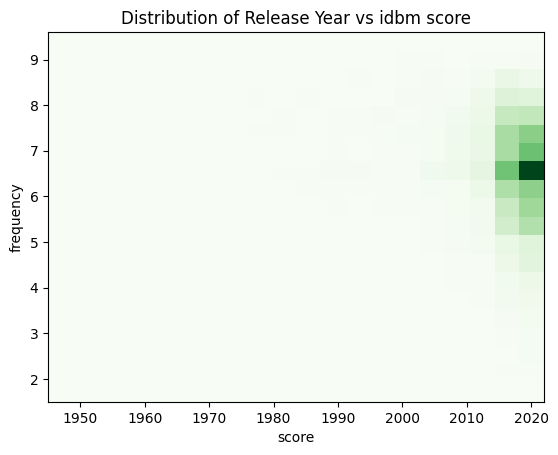

In [10]:
plt.title("Distribution of Release Year vs idbm score")
plt.xlabel("score")
plt.ylabel("frequency")
plt.hist2d(title_d['release_year'], title_d['imdb_score'], bins=(20,20), cmap="Greens")
plt.show()

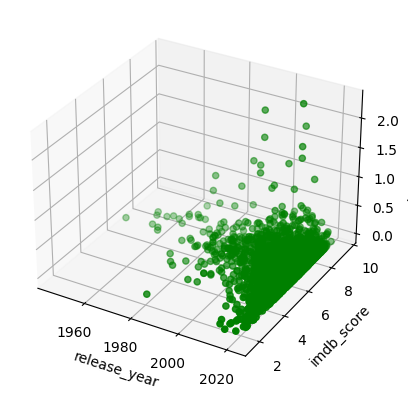

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x = "release_year"
y = "imdb_score"
z = "imdb_votes"

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # Scatter plot
ax.scatter(title_d["release_year"], title_d["imdb_score"], title_d["imdb_votes"], c='green', marker='o')

# Set labels
ax.set_xlabel('release_year')
ax.set_ylabel('imdb_score')
ax.set_zlabel('imdb_votes')

# Show the plot
plt.show()


# CHECKING AND HANDLING OUTLIERS

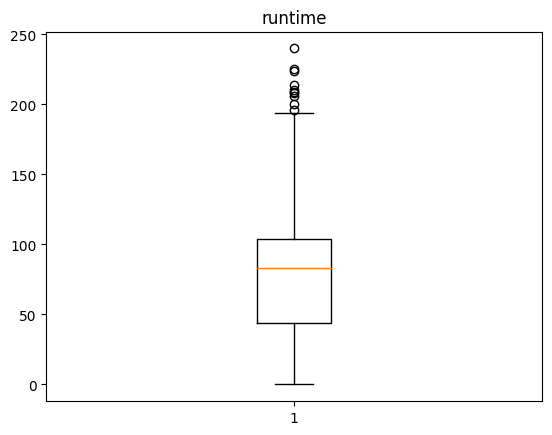

In [12]:
from scipy.stats import zscore
z_score = zscore(title_d["runtime"])

outliers = title_d[np.abs(z_score)> 3]

plt.boxplot(title_d["runtime"])
plt.title("runtime")
plt.show()